<a href="https://colab.research.google.com/github/heena2248/Text_Mining/blob/main/textmining5_textclustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Text Clustering
Calculating similarity scores based on Cosine, Jaccard, Euclidean, Manhattan distance.

Calculating bigram score

Demonstrates k-means, hierarchical clustering, silhouette score calculation

Brown clustering

### Cosine and Jaccard Similarity

In [ ]:
# importing libraries
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
# utility function to evaluate jaccard similarity
def jaccard_similarity(doc_1, doc_2):
    a = set(doc_1.split())
    b = set(doc_2.split())
    c = a.intersection(b)
    return float(len(c)) / (len(a) + len(b) - len(c))
# defining the corpus
corpus = ["my house is empty", "there is no one at mine"]
# to evaluate cosine similarities we need vector representations
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(corpus)
# printing results
print(f"Cosine Similarity: {cosine_similarity(X, X)[0][1]}\nJaccard Simiarity: {jaccard_similarity(corpus[0], corpus[1])}")


Cosine Similarity: 0.11521554337793123
Jaccard Simiarity: 0.1111111111111111


### Similarity as per semantic meaning using gensim

In [ ]:
from gensim import corpora, models, similarities
import jieba
texts = ['I love reading Japanese novels. My favorite Japanese writer is Tanizaki Junichiro.', 'Natsume Soseki is a well-known Japanese novelist and his Kokoro is a masterpiece.', 'American modern poetry is good. ']
keyword = 'Japan has some great novelists. Who is your favorite Japanese writer?'
texts = [jieba.lcut(text) for text in texts]
dictionary = corpora.Dictionary(texts)
feature_cnt = len(dictionary.token2id)
corpus = [dictionary.doc2bow(text) for text in texts]
tfidf = models.TfidfModel(corpus)
kw_vector = dictionary.doc2bow(jieba.lcut(keyword))
index = similarities.SparseMatrixSimilarity(tfidf[corpus], num_features = feature_cnt)
sim = index[tfidf[kw_vector]]
for i in range(len(sim)):
    print('keyword is similar to text%d: %.2f' % (i + 1, sim[i]))

Building prefix dict from the default dictionary ...
DEBUG:jieba:Building prefix dict from the default dictionary ...
Loading model from cache /tmp/jieba.cache
DEBUG:jieba:Loading model from cache /tmp/jieba.cache
Loading model cost 1.863 seconds.
DEBUG:jieba:Loading model cost 1.863 seconds.
Prefix dict has been built successfully.
DEBUG:jieba:Prefix dict has been built successfully.


keyword is similar to text1: 0.50
keyword is similar to text2: 0.02
keyword is similar to text3: 0.00


Doc clustering using K-means

In [ ]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer

# Sample dataset
dataset = ["I love playing football on the weekends",
           "I enjoy hiking and camping in the mountains",
           "I like to read books and watch movies",
           "I prefer playing video games over sports",
           "I love listening to music and going to concerts"]

# Vectorize the dataset
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(dataset)

# Define the number of clusters
k = 2

# Create a k-means model and fit it to the data
km = KMeans(n_clusters=k)
km.fit(X)

# Predict the clusters for each document
y_pred = km.predict(X)

# Print the cluster assignments
print(y_pred)

[1 1 0 1 0]


#### Silhouette score calculation

Silhouette Score: 0.060065242166785694


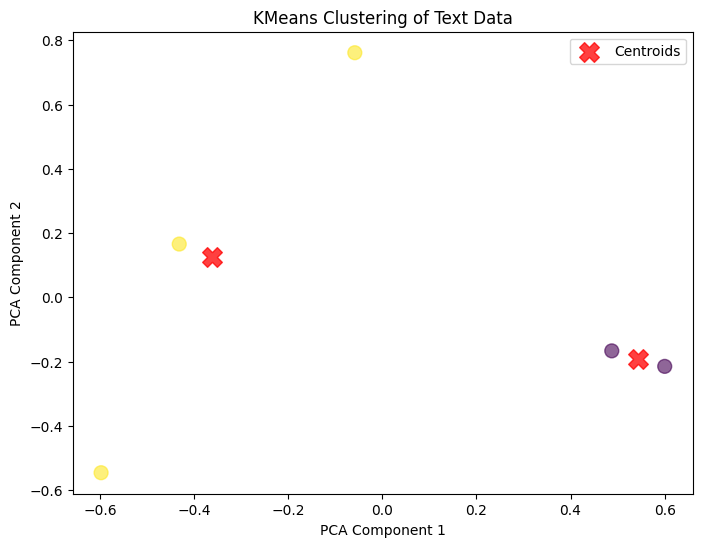

In [ ]:
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Calculate silhouette score
score = silhouette_score(X, y_pred)
print(f'Silhouette Score: {score}')

# Optional: Visualize the clusters (only works well for 2D data)
# Since we have TF-IDF vectors, we can reduce dimensions using PCA for visualization
from sklearn.decomposition import PCA

# Reduce dimensions to 2D for visualization
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X.toarray())

# Plotting the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_pred, s=100, cmap='viridis', alpha=0.6)
plt.title('KMeans Clustering of Text Data')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

# Optional: Mark the cluster centers
centers = pca.transform(km.cluster_centers_)
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X', label='Centroids')
plt.legend()
plt.show()

In [ ]:
import nltk

#### Levenshtein (Edit) distance

In [ ]:
sent1 = "if possible"
sent2 = "possible."
sent_1_2 = nltk.edit_distance(sent1, sent2)
print(sent_1_2, 'Edit Distance between sent1 and sent2')

4 Edit Distance between sent1 and sent2


In [ ]:
 from sklearn.feature_extraction.text import CountVectorizer

#### Cosine and Euclidean distance

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances

def compute_vectors(*strs):
    text = [t for t in strs]
    vectorizer = CountVectorizer()
    vectorizer.fit(text)
    return vectorizer.transform(text).toarray()

def compute_cosine_sim(*strs):
    vectors = compute_vectors(*strs)
    return cosine_similarity(vectors)

def compute_euc_dis(*strs):
    vectors = compute_vectors(*strs)
    return euclidean_distances(vectors)

s1 = "It might help to study nlp if possible."
s2 = "It can help to play football again if possible."

print("cosine_sim:", compute_cosine_sim(s1, s2))
print("euclidean_dis:", compute_euc_dis(s1, s2))

cosine_sim: [[1.         0.58925565]
 [0.58925565 1.        ]]
euclidean_dis: [[0.         2.64575131]
 [2.64575131 0.        ]]


#### Other similarity measures

In [ ]:
def compute_jaccard_sim(str1, str2):
    a = set(str1.split())
    b = set(str2.split())
    c = a.intersection(b)
    return float(len(c)) / (len(a) + len(b) - len(c))

def compute_dice_sim(str1, str2):
    a = set(str1.split())
    b = set(str2.split())
    c = a.intersection(b)
    return 2 * float(len(c)) / (len(a) + len(b))

def compute_overlap_sim(str1, str2):
    a = set(str1.split())
    b = set(str2.split())
    c = a.intersection(b)
    return float(len(c)) / min(len(a), len(b))

sent1 = "It might help to study nlp if possible."
sent2 = "It can help to play football again if possible."

print("jaccard:", compute_jaccard_sim(sent1, sent2))
print("dice:", compute_dice_sim(sent1, sent2))
print("overlap:", compute_overlap_sim(sent1, sent2))

jaccard: 0.4166666666666667
dice: 0.5882352941176471
overlap: 0.625


#### Manhattan distance

In [ ]:
import numpy as np
point_a_np = np.array([1, 1, 1])
point_b_np = np.array([4, 5, 6])
distance_numpy = np.sum(np.abs(point_a_np - point_b_np))
print(f"Manhattan distance (NumPy): {distance_numpy}")

Manhattan distance (NumPy): 12


In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

#### Bigram score
Corpus-Based similarity determines the semantic similarity between words according to information gained from a large corpora. Pointwise Mutual Information is an example of corpus based similarity.

Pointwise Mutual Information — Information Retrieval is a method for computing the similarity between pairs of words The more often two words co-occur near each other on a web page, the higher is their PMI-IR similarity score.

In [ ]:
import nltk
from nltk.collocations import BigramCollocationFinder
from nltk.metrics import BigramAssocMeasures
from nltk.tokenize import word_tokenize

# Sample text
text = "this is a foo bus red car foo bus bus blue car foo bar bar red car shep bus bus blue"

# Tokenize the text
tokens = word_tokenize(text)

# Create bigram finder
bigram_measures = BigramAssocMeasures()
finder = BigramCollocationFinder.from_words(tokens)

# Print out bigrams with PMI scores
for bigram, score in finder.score_ngrams(bigram_measures.pmi):
    print(bigram, score)

('is', 'a') 4.392317422778761
('this', 'is') 4.392317422778761
('a', 'foo') 2.8073549220576046
('car', 'shep') 2.8073549220576046
('red', 'car') 2.8073549220576046
('bar', 'bar') 2.3923174227787607
('bar', 'red') 2.3923174227787607
('car', 'foo') 2.2223924213364485
('bus', 'blue') 2.0703893278913985
('shep', 'bus') 2.0703893278913985
('blue', 'car') 1.8073549220576046
('foo', 'bar') 1.8073549220576046
('foo', 'bus') 1.485426827170242
('bus', 'red') 1.0703893278913985
('bus', 'bus') 0.7484612330040363


#### Project model
20newsgroup dataset:
The 20 Newsgroups dataset is a widely used benchmark dataset in the field of natural language processing and machine learning. It comprises a collection of approximately 20,000 newsgroup documents, classified into 20 different categories or topics. These topics cover a diverse range of subjects, including politics, sports, technology, and more. Each document is a representation of discussions and posts from Usenet newsgroups, providing a rich and varied source of text data for experimentation and analysis. The dataset’s popularity stems from its realistic and representative nature, making it an ideal choice for tasks such as text classification, clustering, and topic modeling.
Importing Datasets:

In [ ]:
import re

In [ ]:
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
from sklearn.datasets import fetch_20newsgroups
news_data = fetch_20newsgroups(subset = 'all', random_state=1)

In [ ]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize

In [ ]:
def removeStopwords(text):
    words = text.split()
    stop_words = set(stopwords.words('english'))
    filtered_words = [word for word in words if word.lower() not in stop_words]
    filtered_text = ' '.join(filtered_words)
    return filtered_text

In [ ]:
def lemmatization(text):
    ps = PorterStemmer()
    lemmatizer = WordNetLemmatizer()
    words = word_tokenize(text)
    lWords = [lemmatizer.lemmatize(word) for word in words]
    lText = ' '.join(lWords)
    return lText

In [ ]:
def preprocess(text):
    text = str(text.split(':')[-1])
    text = text.lower()
    text = re.sub(r'\([^)]*\)', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'[\d_]+', '', text)
    text = removeStopwords(text)
    text = lemmatization(text)
    return text

In [ ]:
textData = list(news_data.data)
for index, text in enumerate(textData):
    textData[index] = preprocess(text)

Either TF-IDF or Word2Vec or Glove can be used.

TF-IDF: transforming text into feature vectors
TF-IDF (Term Frequency-Inverse Document Frequency) is a popular text embedding technique that converts text documents into numerical feature vectors. It considers both the frequency of a term in a document (TF) and the inverse frequency of the term across all documents (IDF). This method helps in capturing the importance of words in a document relative to the entire corpus, making it useful for text analysis and clustering tasks.

Word2Vec: Capturing Semantic Similarities
Word2Vec is a technique based on neural networks that represent words in a continuous vector space. It captures semantic relationships between words by mapping them to vectors where similar words are closer together in the vector space. This approach is valuable for capturing contextual information and semantic similarities, enhancing the quality of clustering results.

GloVe: Global Vectors for Word Representation
GloVe (Global Vectors for Word Representation) is another word embedding technique that focuses on capturing global word co-occurrence statistics. It generates word vectors based on the overall context in which words appear, rather than just local context. This method often leads to embeddings that reflect meaningful semantic relationships and can improve clustering accuracy.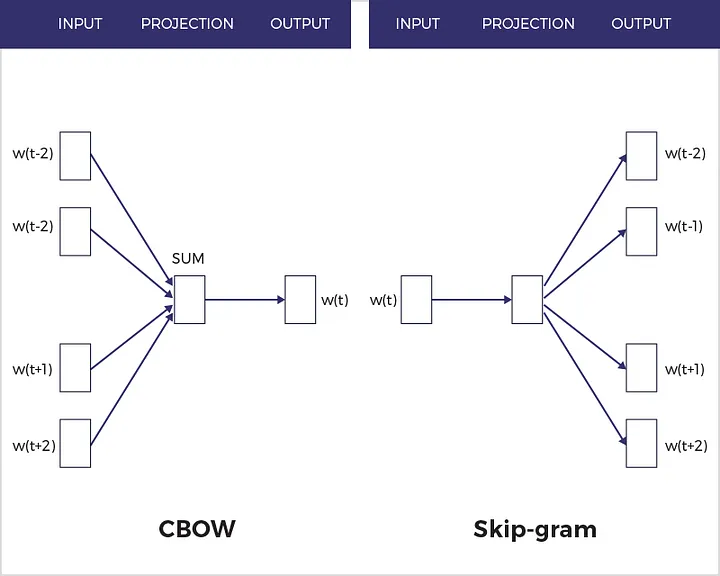

In [ ]:
"""vectorizer = TfidfVectorizer()
textVec = vectorizer.fit_transform(textData)

textVecArray = textVec.toarray()
pca = PCA(n_components=2)

pca.fit(textVecArray)
X_pca = pca.transform(textVecArray)

X_pca.shape"""

'vectorizer = TfidfVectorizer()\ntextVec = vectorizer.fit_transform(textData)\n\ntextVecArray = textVec.toarray()\npca = PCA(n_components=2)\n\npca.fit(textVecArray)\nX_pca = pca.transform(textVecArray)\n\nX_pca.shape'

In [ ]:
!pip install word2vec

In [ ]:
import word2vec

In [ ]:
import numpy as np
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from nltk.tokenize import word_tokenize
# Tokenize and lowercase the sentences
tokenized_data = [word_tokenize(sentence.lower()) for sentence in textData]

# Train Word2Vec model
model = Word2Vec(sentences=tokenized_data, vector_size=100, window=5, min_count=1, workers=4)

# Function to calculate the average word vectors
def average_word_vectors(words, model, vocabulary, num_features):
    feature_vector = np.zeros((num_features,), dtype="float64")
    n_words = 0
    for word in words:
        if word in vocabulary:  # Check if the word is in the model's vocabulary
            n_words += 1
            feature_vector = np.add(feature_vector, model.wv[word])
    if n_words:
        feature_vector = np.divide(feature_vector, n_words)
    return feature_vector

# Get average word vectors for each sentence
word_vectors = []
for words in tokenized_data:
    word_vectors.append(average_word_vectors(words, model, model.wv.index_to_key, 100))

# Perform PCA to reduce the dimensionality of the word vectors
pca = PCA(n_components=2)
X_pca = pca.fit_transform(word_vectors)

# Output the shape of the PCA-transformed vectors
print(X_pca.shape)

(18846, 2)


In [ ]:
from collections import defaultdict
import pandas as pd

K-means: Partitioning Data Points into Clusters
K-means is a classic clustering algorithm that partitions data points into k clusters based on their feature similarity. It iteratively assigns data points to clusters and updates cluster centroids until convergence. K-means is efficient and easy to implement, making it a go-to choice for many clustering tasks, including text clustering.

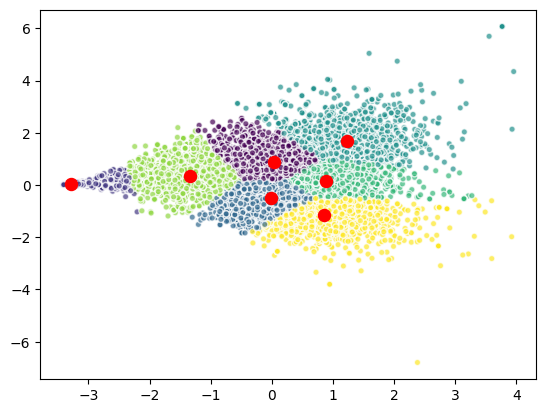

7 0.38335087870690987
   count
0   2272
1   1845
2   4345
3   1887
4   3151
5   1680
6   3666


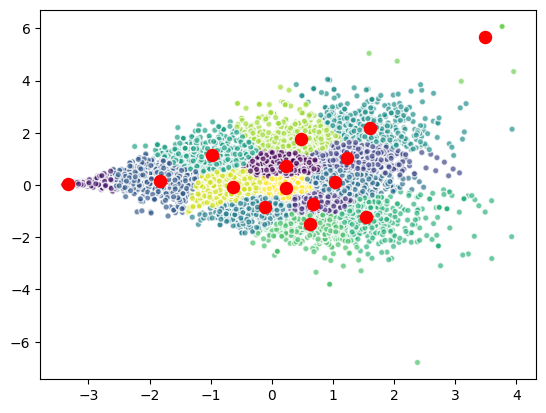

15 0.3733376995484726
    count
0    1641
1    1743
2    2453
3    1375
4     807
5    1443
6    1618
7     528
8     695
9     819
10   1272
11     16
12    725
13   1429
14   2282


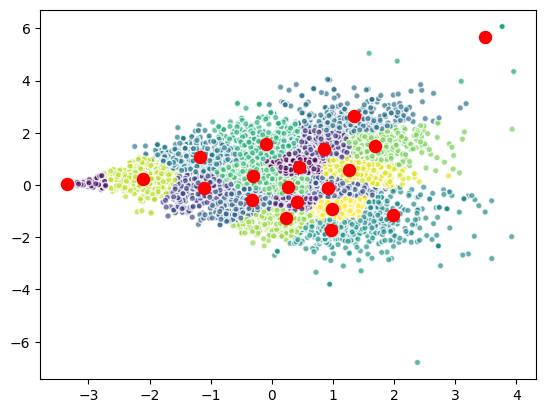

20 0.3707950934769273
    count
0    1251
1    1709
2    1847
3     992
4     746
5    1232
6    1339
7     294
8     579
9     298
10    736
11     16
12    533
13   1127
14   1688
15    578
16   1080
17    543
18    906
19   1352


In [ ]:
from sklearn.cluster import DBSCAN

nClusters = [7, 15, 20]
silhouetteScore = defaultdict(float)
groupCount = defaultdict(pd.DataFrame)
for i in nClusters:
    kmeans = KMeans(n_clusters=i, random_state=69)
    kmeans.fit(X_pca)

    clusterLabels = kmeans.labels_
    silhouetteScore[i] = silhouette_score(X_pca, clusterLabels)

    clusterCount = np.bincount(clusterLabels)
    tempDict = {}
    for index, count in enumerate(clusterCount):
        tempDict[index] = count
    tempDict = pd.DataFrame.from_dict(tempDict, orient='index', columns=['count'])
    groupCount[i] = tempDict

    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_, cmap='viridis', s=20, alpha=0.7, edgecolors='w')
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='o', c='red', s=75)
    plt.show()
    print(i, silhouetteScore[i])
    print(groupCount[i])

DBSCAN: Density-Based Spatial Clustering of Applications with Noise
DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is a density-based clustering algorithm that can identify clusters of varying shapes and sizes. It groups together data points that are closely packed, considering density rather than predefined clusters. DBSCAN is robust to noise and capable of handling complex data structures, making it suitable for text clustering tasks.

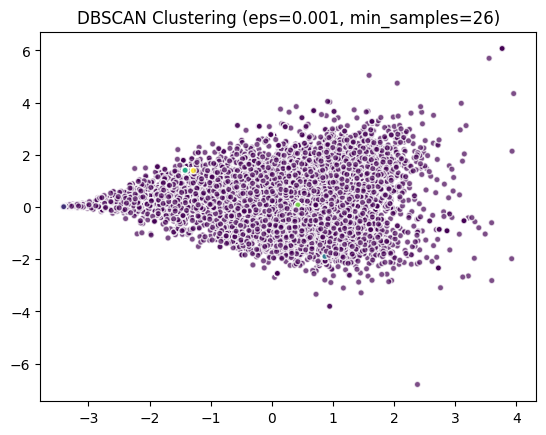

EPS=0.001, Min Samples=26
Silhouette Score: 0.3707950934769273
Cluster Counts:
 -1    17971
 0      719
 1       31
 2       27
 3       72
 4       26
Name: count, dtype: int64


In [ ]:
eps, min_samples = 0.001, 26

silhouette_scores = {}
group_count = {}

dbscan = DBSCAN(eps=0.001, min_samples=26)
cluster_labels = dbscan.fit_predict(X_pca)

silhouette_scores[(eps, min_samples)] = silhouette_score(X_pca, cluster_labels)

cluster_count = pd.Series(cluster_labels).value_counts().sort_index()
group_count[(eps, min_samples)] = cluster_count

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis', s=20, alpha=0.7, edgecolors='w')
plt.title(f"DBSCAN Clustering (eps={eps}, min_samples={min_samples})")
plt.show()
print(f"EPS={eps}, Min Samples={min_samples}")
print("Silhouette Score:", silhouetteScore[20])
print("Cluster Counts:\n", group_count[tuple((0.001, 26))])

AGNES : Agglomerative Nesting
AGNES (Agglomerative Nesting) is an agglomerative hierarchical clustering algorithm that starts with each data point as a singleton cluster and iteratively merges clusters based on their similarity. It forms a hierarchy of clusters, allowing for a hierarchical view of the data’s clustering structure. AGNES is versatile and can handle different similarity metrics, making it useful for exploring cluster relationships in text data.

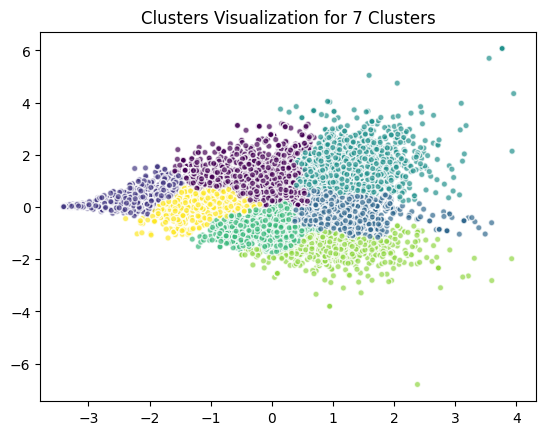

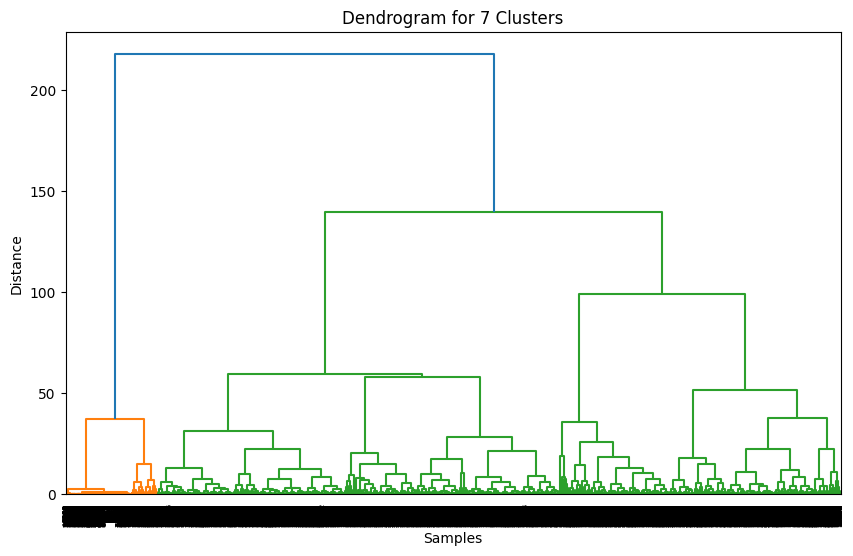

Number of Clusters: 7
Silhouette Score: 0.32450372710575276
Group Counts:
   count
0   2785
1   2242
2   3478
3   2659
4   4542
5   1756
6   1384


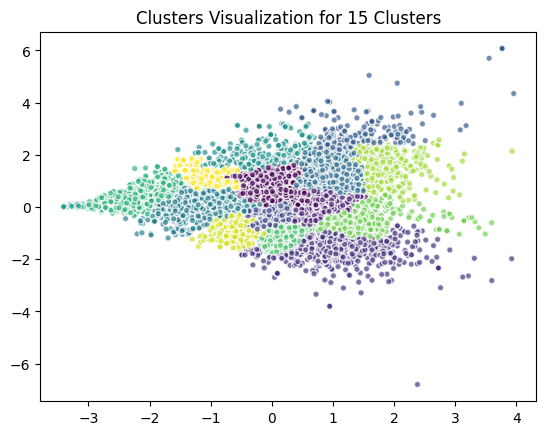

KeyboardInterrupt: 

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import dendrogram, linkage
nClusters = [7, 15]
silhouette_scores = defaultdict(float)
groupCount = defaultdict(pd.DataFrame)

for i in nClusters:
    # Perform Agglomerative Clustering
    agnes = AgglomerativeClustering(n_clusters=i)
    clusterLabels = agnes.fit_predict(X_pca)

    # Calculate silhouette score
    silhouette_scores[i] = silhouette_score(X_pca, clusterLabels)

    # Get cluster counts
    clusterCount = np.bincount(clusterLabels)
    tempDict = {}
    for index, count in enumerate(clusterCount):
        tempDict[index] = count
    tempDict = pd.DataFrame.from_dict(tempDict, orient='index', columns=['count'])
    groupCount[i] = tempDict

    # Scatter plot for visualizing the clusters
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusterLabels, cmap='viridis', s=20, alpha=0.7, edgecolors='w')
    plt.title(f'Clusters Visualization for {i} Clusters')
    plt.show()

    # Generate dendrogram
    dist_mat = pdist(X_pca)
    linkage_matrix = linkage(dist_mat, method='ward')

    plt.figure(figsize=(10, 6))
    dendrogram(linkage_matrix)
    plt.title(f'Dendrogram for {i} Clusters')
    plt.xlabel('Samples')
    plt.ylabel('Distance')
    plt.show()

    # Print silhouette score and cluster counts
    print(f"Number of Clusters: {i}")
    print(f"Silhouette Score: {silhouette_scores[i]}")
    print(f"Group Counts:\n{groupCount[i]}")



Expectation-Maximization (EM) Algorithm
Expectation-Maximization (EM) is a general-purpose iterative algorithm used to estimate parameters of statistical models, especially when dealing with incomplete or hidden data. It's used in scenarios where there are latent variables (hidden or unobserved data) in the model, such as clustering or missing data problems.

The EM algorithm alternates between two main steps:

Expectation (E-step): In this step, the algorithm computes the "expected" value of the latent (hidden) variables based on the current parameter estimates.
Maximization (M-step): In this step, the algorithm re-estimates the parameters by maximizing the likelihood of the observed data, treating the latent variables as known (from the E-step).
This process is repeated until the model converges to a local optimum, meaning the parameters don't change significantly between iterations.

Key Uses of EM:
Clustering: One of the most popular applications is clustering data using Gaussian Mixture Models (GMM).
Missing data: EM can be used to estimate missing values in a dataset.

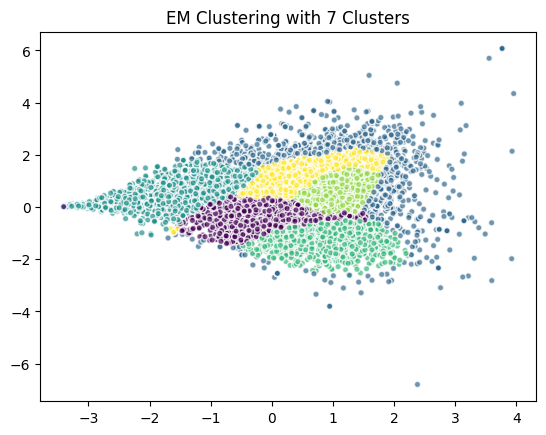

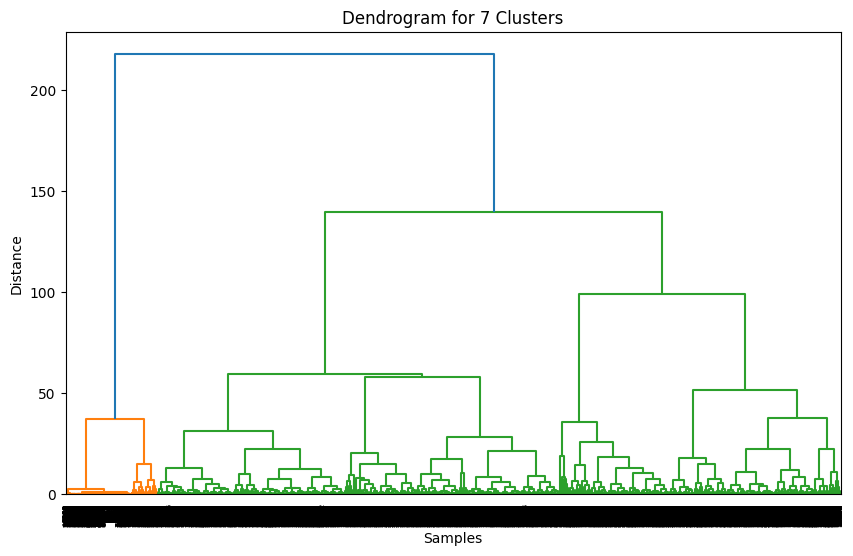

Number of Clusters: 7
Silhouette Score: 0.28731057853412734
Group Counts:
   count
0   5650
1   1305
2    958
3   2006
4   3913
5   2757
6   2257


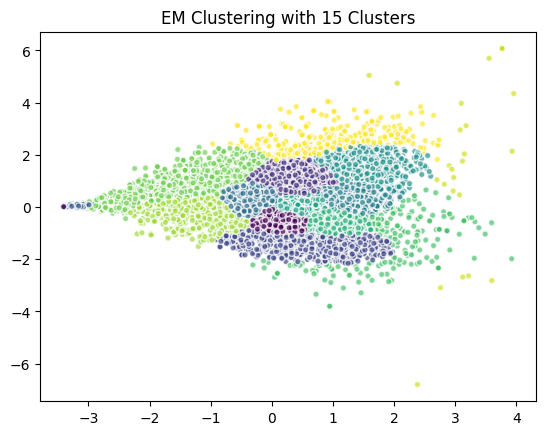

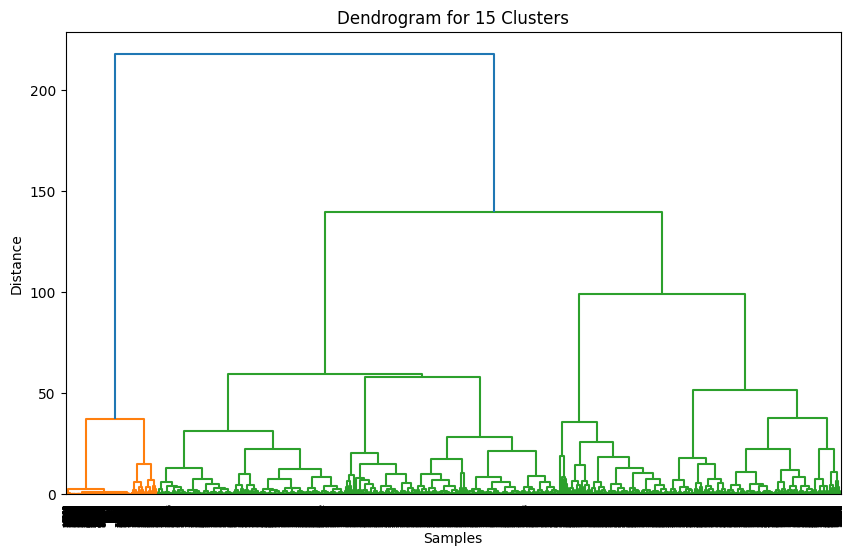

Number of Clusters: 15
Silhouette Score: 0.3048480495227751
Group Counts:
    count
0    2603
1    1275
2    1833
3    2371
4     384
5    1552
6    1049
7    1080
8    1820
9    1947
10    234
11   1186
12   1134
13     33
14    345


In [ ]:
from sklearn.mixture import GaussianMixture
nClusters = [7, 15]  # Number of clusters to try
silhouette_scores = defaultdict(float)
groupCount = defaultdict(pd.DataFrame)

for i in nClusters:
    # Initialize the Gaussian Mixture model (Expectation-Maximization Clustering)
    gmm = GaussianMixture(n_components=i, random_state=42)

    # Fit the model to the data and predict cluster labels
    clusterLabels = gmm.fit_predict(X_pca)

    # Calculate the silhouette score for each cluster configuration
    silhouette_scores[i] = silhouette_score(X_pca, clusterLabels)

    # Get cluster counts

    clusterCount = np.bincount(clusterLabels)
    tempDict = {}
    for index, count in enumerate(clusterCount):
        tempDict[index] = count
    tempDict = pd.DataFrame.from_dict(tempDict, orient='index', columns=['count'])
    groupCount[i] = tempDict

    # Scatter plot of the clusters
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusterLabels, cmap='viridis', s=20, alpha=0.7, edgecolors='w')
    plt.title(f'EM Clustering with {i} Clusters')
    plt.show()

    # Distance matrix and dendrogram-like linkage plot (using Ward linkage on Euclidean distance)
    dist_mat = pdist(X_pca)  # Compute the pairwise distances between points
    linkage_matrix = linkage(dist_mat, method='ward')  # Ward linkage for hierarchical clustering

    plt.figure(figsize=(10, 6))
    dendrogram(linkage_matrix)
    plt.title(f'Dendrogram for {i} Clusters')
    plt.xlabel('Samples')
    plt.ylabel('Distance')
    plt.show()

    # Print silhouette score and group counts
    print(f"Number of Clusters: {i}")
    print(f"Silhouette Score: {silhouette_scores[i]}")
    print(f"Group Counts:\n{groupCount[i]}")

#### Brown Clustering example:
Brown Clustering is a hierarchical clustering algorithm that is particularly used for clustering words based on their co-occurrence in a corpus. It’s often applied in NLP for word clustering. Unfortunately, scikit-learn does not have built-in support for Brown clustering, but the algorithm can be implemented or applied using specific libraries or by following the basic hierarchical clustering structure.

If you want to apply Brown clustering for the above dataset (which involves word clusters or vectors), here's a brief overview of how Brown clustering works and how you could approach it.

Steps for Brown Clustering:
Co-occurrence Matrix: First, a co-occurrence matrix is built by counting how often each word appears next to another word in the corpus.
Hierarchical Merging: Words are iteratively merged into clusters based on maximizing mutual information. Brown clustering merges two clusters in each iteration, minimizing the loss of mutual information.

The bc.get_clusters() method would print clusters of words that are likely to occur together. Brown clustering is useful in NLP tasks like part-of-speech tagging and named entity recognition, as it groups semantically similar words.

However, Brown Clustering works for hierarchical word clustering tasks and may not directly apply to typical vectorized data like X_pca used in previous examples, which are numerical. You could adapt it by working with word data and co-occurrence statistics, applying Brown clustering to identify clusters of words.

If you want to apply Brown clustering to your dataset with numeric features (X_pca), the hierarchical methods you've already explored, like Agglomerative Clustering, would be more suitable.

In [ ]:
!pip install brown-clustering

In [ ]:
from brown_clustering import BigramCorpus, BrownClustering

# use some tokenized and preprocessed data
sentences = [['this', 'is', 'a', 'foo', 'bus'],
                  ['red', 'car', 'foo', 'bus'],
                  ['bus', 'blue', 'car', 'foo', 'bar', 'bar', 'red', 'car'],
                  ['shep', 'bus', 'bus', 'blue']]


# create a corpus
corpus = BigramCorpus(sentences, alpha=0.5, min_count=0)

# (optional) print corpus statistics:
corpus.print_stats()

# create a clustering
clustering = BrownClustering(corpus, m=4)

# train the clustering
clusters = clustering.train()

Vocab count: 10
Token count: 21
unique 2gram count: 20
2gram count: 25.0
Laplace smoothing: 0.5


100%|██████████| 10/10 [00:00<00:00, 1555.92it/s]


In [ ]:
# use the clustered words
print(clusters)

# get codes for the words
print(clustering.codes())

[['bus', 'bar', 'shep', 'this'], ['car', 'a'], ['foo'], ['red', 'blue', 'is']]
{'bus': '000000', 'bar': '000001', 'red': '00100', 'blue': '00101', 'car': '010', 'a': '011', 'is': '0011', 'shep': '00001', 'this': '0001', 'foo': '1'}
